<a href="https://colab.research.google.com/github/isabelsanttana/Analise_de_dados/blob/main/Trabalho_Correlacao_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>    
        <CENTER><b>Estatística para Ciência de Dados</b><br/>
        <CENTER><b>Prof: Saulo Pereira Ribeiro</b>
        <CENTER><b>Trabalho 2 - Correlação e Regressão Linear</b><br/></CENTER><br/>

***

## Trabalho de Correlação e Regressão Linear



***
##Integrantes
* Guilherme Catrinque Drummond Fernandes
* Maria Isabel Santana de Araujo
* Rodrigo Pela Hernandes
* Windsor Lóss Assis

***

# Dataset do projeto
***

<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large186.jpg" alt="vinho" style = width="900px"; height="200px">
        </CENTER>

### <b>Qualidade do vinho branco</b>

Esse conjunto de dados datado de 2009 mostra variáveis de entrada físico-quimicas para produção de vinhos, assim como a nota de qualidade do respectivo vinho.

### Fonte dos Dados

https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Variáveis utilizadas

|Coluna|Tradução|Tipo de Variavel|Obs|
|---|---|---|---|
|fixed acidity|acidez fixa|Entrada||
|volatile acidity|acidez volátil|Entrada||
|citric acid|ácido cítrico|Entrada||
|residual sugar|açúcar residual|Entrada||
|chlorides|cloretos|Entrada||
| free sulfur dioxide|dióxido de enxofre livre|Entrada||
|total sulfur dioxide|dióxido de enxofre total|Entrada||
|density|densidade|Entrada||
|pH|pH|Entrada||
|sulphates|sulfatos|Entrada||
|alcohol|álcool|Entrada||
|quality |qualidade |Saída|pontuação entre 0 e 10|


### <font color='blue'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros duplicados;
> 2. Foram eliminados os registros nulos;


### Importando bibliotecas



In [223]:
# down grade da versão do scipy
!pip install scipy==1.2 --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Lendo o dataset do projeto

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
dados = pd.read_csv('/content/drive/MyDrive/UVV/Trabalhos/Estatistica/trab_2/winequality-white.csv', sep=";")

In [228]:
dados.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Sobre os dados

In [229]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [230]:
# Qnt de linhas e colunas
dados.shape 

(4898, 12)

In [231]:
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [232]:
# colunas do dataset
dados.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

### Tratando os dados

In [233]:
# retirar duplicados/linhas vazias

dados = dados.drop_duplicates()
dados.dropna(how='all', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Estatísticas descritivas

In [234]:
dados.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00,3961.00
mean,6.84,0.28,0.33,5.91,0.05,34.89,137.19,0.99,3.20,0.49,10.59,5.85
std,0.87,0.10,0.12,4.86,0.02,17.21,43.13,0.00,0.15,0.11,1.22,0.89
min,3.80,0.08,0.00,0.60,0.01,2.00,9.00,0.99,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.60,0.04,23.00,106.00,0.99,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,4.70,0.04,33.00,133.00,0.99,3.18,0.48,10.40,6.00
75%,7.30,0.33,0.39,8.90,0.05,45.00,166.00,1.00,3.29,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,0.35,289.00,440.00,1.04,3.82,1.08,14.20,9.00


# Visualização Gráfica

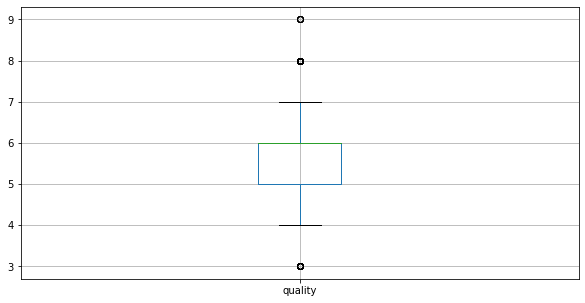

In [235]:
plt.figure(figsize=(10,5))
dados.boxplot(column=['quality'])

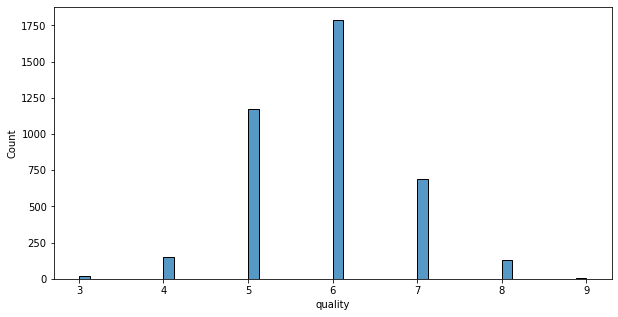

In [236]:
# qualidade do vinho

plt.figure(figsize=(10,5))
sns.histplot(x='quality', data=dados)

In [237]:
print(f'O grafico acima mostra que a media de qualidade dos vinhos é entre 5 e 7, e sendo mais exatos {round(dados.quality.mean(),2)} .')
print('E no nosso boxPlot conseguimos notar que a muitos outliers em nossos dados.')

O grafico acima mostra que a media de qualidade dos vinhos é entre 5 e 7, e sendo mais exatos 5.85 .
E no nosso boxPlot conseguimos notar que a muitos outliers em nossos dados.


# Análise da correlação


In [238]:
correlacao = dados.corr()
correlacao

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


In [239]:
corr = correlacao.quality
corr = corr.drop(['quality'], axis=0) 
corr.sort_values(ascending=False)

alcohol                 0.462869
pH                      0.123829
sulphates               0.053200
free sulfur dioxide     0.010507
citric acid             0.007065
residual sugar         -0.117339
fixed acidity          -0.124636
total sulfur dioxide   -0.183356
volatile acidity       -0.190678
chlorides              -0.217739
density                -0.337805
Name: quality, dtype: float64

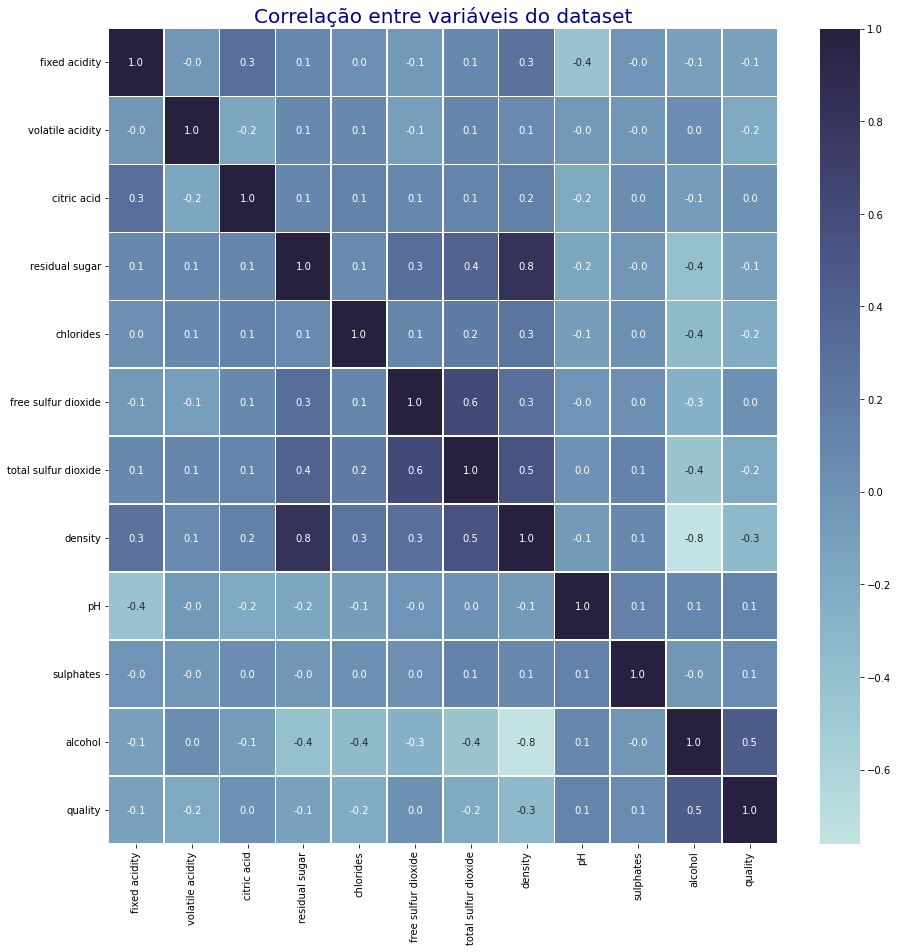

In [240]:
plt.figure(figsize=(15,15))
plot = sns.heatmap(correlacao,annot = True,fmt=".1f",linewidths=.6,cmap= sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.title('Correlação entre variáveis do dataset',fontsize= 20,color='darkblue')
plt.show()

In [279]:
print('Analisando o grafico de correlação conseguimos perceber pontos como \na densidade do vinho estar correlacionada com o nivel residual de açucar;')
print('a baixa qualidade do vinho estar ligada a densidade do mesmo;')
print('a qualidade do vinho esta ligada principalmente ao seu nivel alcoolico;')
print('dentre outras observações.')

Analisando o grafico de correlação conseguimos perceber pontos como 
a densidade do vinho estar correlacionada com o nivel residual de açucar;
a baixa qualidade do vinho estar ligada a densidade do mesmo;
a qualidade do vinho esta ligada principalmente ao seu nivel alcoolico;
dentre outras observações.


<Figure size 720x720 with 0 Axes>

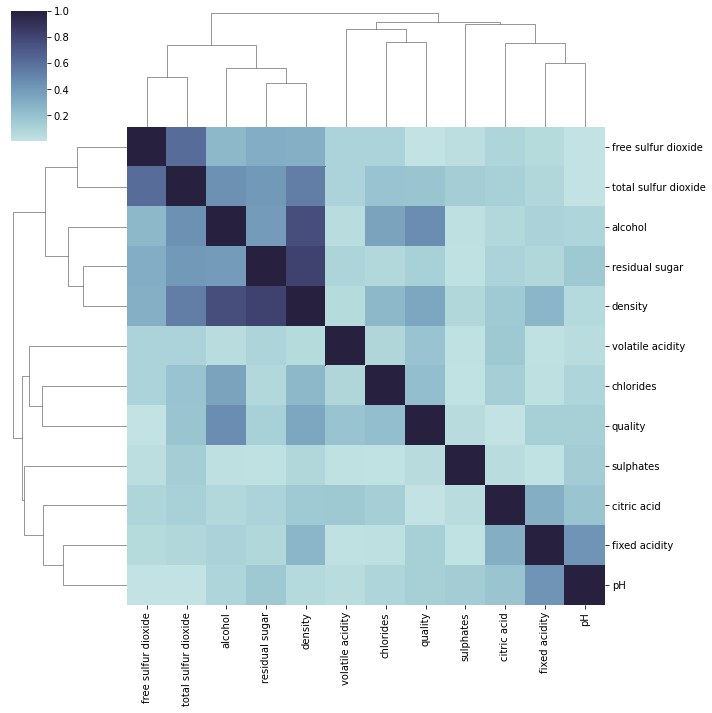

In [241]:
plt.figure(figsize=(10,10))
sns.clustermap(abs(correlacao), cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


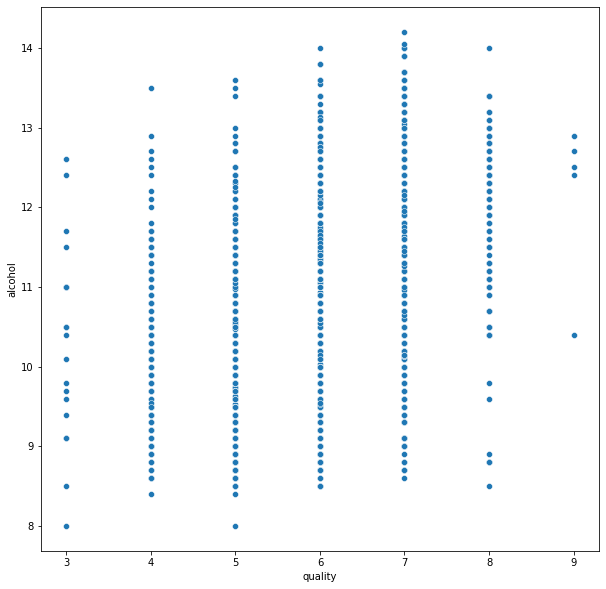

In [242]:
# Relação Alcool X Qualidade

plt.figure(figsize=(10,10))
sns.scatterplot(dados.quality, dados.alcohol)

In [243]:
dataset = {
    'Y_Qualidade_do_Vinho': dados.quality,
    'X_Alcool': dados.alcohol}

dataset = pd.DataFrame(dataset)
dataset.head()

,Y_Qualidade_do_Vinho,X_Alcool
0,6,8.8
1,6,9.5
2,6,10.1
3,6,9.9
6,6,9.6


In [244]:
dataset.corr()

,Y_Qualidade_do_Vinho,X_Alcool
Y_Qualidade_do_Vinho,1.000000,0.462869
X_Alcool,0.462869,1.000000


# Modelo de regressão linear simples


In [245]:
y = dataset.Y_Qualidade_do_Vinho
x = sm.add_constant(dataset.X_Alcool)

y.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0    6
1    6
2    6
3    6
6    6
Name: Y_Qualidade_do_Vinho, dtype: int64

In [246]:
x.head()

,const,X_Alcool
0,1.0,8.8
1,1.0,9.5
2,1.0,10.1
3,1.0,9.9
6,1.0,9.6


In [247]:
# Estimando o modelo

resultadoRegressao = sm.OLS(y, x).fit()
print(resultadoRegressao.summary())

                             OLS Regression Results                             
Dep. Variable:     Y_Qualidade_do_Vinho   R-squared:                       0.214
Model:                              OLS   Adj. R-squared:                  0.214
Method:                   Least Squares   F-statistic:                     1079.
Date:                  Fri, 10 Jun 2022   Prob (F-statistic):          1.43e-209
Time:                          03:09:22   Log-Likelihood:                -4683.8
No. Observations:                  3961   AIC:                             9372.
Df Residuals:                      3959   BIC:                             9384.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2678      0.110

### Obtendo as previsões dentro da amostra

In [248]:
dataset['Y Previsto'] = resultadoRegressao.predict().round(2)
dataset

,Y_Qualidade_do_Vinho,X_Alcool,Y Previsto
0,6,8.8,5.25
1,6,9.5,5.49
2,6,10.1,5.69
3,6,9.9,5.62
6,6,9.6,5.52
...,...,...,...
4893,6,11.2,6.06
4894,5,9.6,5.52
4895,6,9.4,5.45
4896,7,12.8,6.60


# Função para estimar o valor de Y

In [249]:
resultadoRegressao.params

const       2.267819
X_Alcool    0.338738
dtype: float64

In [250]:
beta1 = resultadoRegressao.params[0]
beta2 = resultadoRegressao.params[1]

In [251]:
def prever(x):
  return beta1 + beta2 * x

In [252]:
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 7 - {prever(7).round(2)}')
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 5 - {prever(5).round(2)}')
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 3 - {prever(3).round(2)}')

Prevendo a qualidade do vinho com um nivel de acohol como 7 - 4.64
Prevendo a qualidade do vinho com um nivel de acohol como 5 - 3.96
Prevendo a qualidade do vinho com um nivel de acohol como 3 - 3.28


In [253]:
qa = dados[['alcohol','quality']]

print('Comparando resultados da função com resultados do Dataset\n')
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 8.8 - {prever(8.8).round(2)}')
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 9.5 - {prever(9.5).round(2)}')
print(f'Prevendo a qualidade do vinho com um nivel de acohol como 10.1 - {prever(10.1).round(2)}\n')
print(qa.head(3))
print('')

print('Todos os valores se aproximaram do valor real.')

Comparando resultados da função com resultados do Dataset

Prevendo a qualidade do vinho com um nivel de acohol como 8.8 - 5.25
Prevendo a qualidade do vinho com um nivel de acohol como 9.5 - 5.49
Prevendo a qualidade do vinho com um nivel de acohol como 10.1 - 5.69

   alcohol  quality
0      8.8        6
1      9.5        6
2     10.1        6

Todos os valores se aproximaram do valor real.


#  Rquadrado

In [254]:
rquadrado = resultadoRegressao.rsquared
rquadrado

0.21424800749926132

In [255]:
print(f'Isso significa que 21,42% da variação na qualidade do vinho pode ser explicada pelo nivel de Alcool.')

Isso significa que 21,42% da variação na qualidade do vinho pode ser explicada pelo nivel de Alcool.


# EXTRA

Devido ao tempo extra atribuido para a realização do trabalho decidimos fazer um estudo de regressão linear com um pequeno dataset encontrado. 

## Dataset

Fonte dos Dados 
https://www.kaggle.com/datasets/pkmisra/students-marks-dataset

In [256]:
dt = pd.read_csv('/content/drive/MyDrive/UVV/Trabalhos/Estatistica/trab_2/student_info.csv', sep=",")
dt.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [257]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [258]:
dt.shape

(200, 2)

In [259]:
dt.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

### Tratando os dados

In [260]:
# retirar duplicados/linhas vazias

dt = dt.drop_duplicates()
dt.dropna(how='any', inplace=True) # removendo linhas onde qualquer coluna seja NaN

In [261]:
dt.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

### Estatísticas descritivas

In [262]:
dt.describe().round(2)

,study_hours,student_marks
count,195.00,195.00
mean,7.00,77.96
std,1.25,4.98
min,5.01,68.57
25%,5.78,73.30
50%,7.12,77.78
75%,8.09,82.44
max,8.99,86.99


## Visualização Gráfica

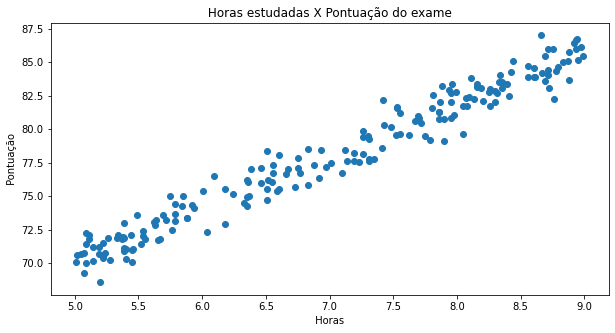

In [263]:
plt.figure(figsize=(10,5))
plt.scatter(dt.study_hours , dt.student_marks)
plt.title(' Horas estudadas X Pontuação do exame ')
plt.xlabel(' Horas ')
plt.ylabel(' Pontuação ')
plt.show()

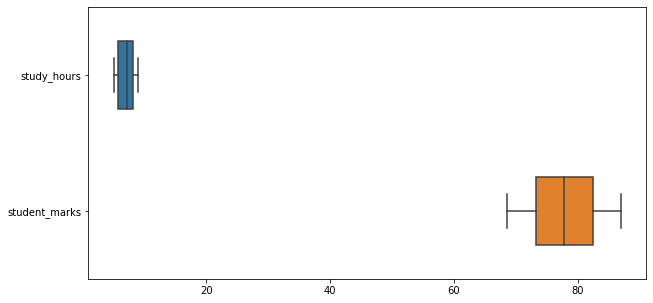

In [264]:
bp = sns.boxplot(data=dt, orient='h', width=0.5)
bp.figure.set_size_inches(10, 5)
bp

In [265]:
print('A partir do grafico de disperssao, podemos ver que a relação parece ser linear.')
print('E no box plot conseguimos ver que não tem outliers nos dados.')

A partir do grafico de disperssao, podemos ver que a relação parece ser linear.
E no box plot conseguimos ver que não tem outliers nos dados.


## Análise de Correlação

In [266]:
correlacao = dt.corr()
correlacao

,study_hours,student_marks
study_hours,1.000000,0.979919
student_marks,0.979919,1.000000


In [267]:
corr = correlacao.student_marks
corr = corr.drop(['student_marks'], axis=0) 
corr.sort_values(ascending=False)

study_hours    0.979919
Name: student_marks, dtype: float64

## Modelo de regressão linear simples

In [268]:
y = dt['student_marks']
x = sm.add_constant(dt.study_hours)

regressao = sm.OLS(y, x).fit()

print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:          student_marks   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4661.
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          4.09e-137
Time:                        03:10:18   Log-Likelihood:                -274.92
No. Observations:                 195   AIC:                             553.8
Df Residuals:                     193   BIC:                             560.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          50.7018      0.406    125.009      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


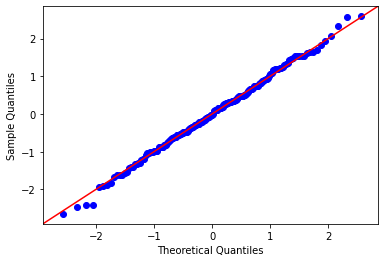

In [269]:
res = regressao.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

In [270]:
print('Neste grafico QQ conseguimos ver que os dados seguem uma distribuição normal')

Neste grafico QQ conseguimos ver que os dados seguem uma distribuição normal


## Função para estimar o valor de Y

In [271]:
regressao.params
beta1 = regressao.params[0]
beta2 = regressao.params[1]

In [272]:
def preverNota(x):
  return beta1 + beta2 * x

In [273]:
print(f'Prevendo a nota do aluno com 8 horas de estudo - {preverNota(8).round(2)}')
print(f'Prevendo a nota do aluno com 1 horas de estudo - {preverNota(1).round(2)}')
print(f'Prevendo a nota do aluno com 5 horas de estudo - {preverNota(5).round(2)}')

Prevendo a nota do aluno com 8 horas de estudo - 81.87
Prevendo a nota do aluno com 1 horas de estudo - 54.6
Prevendo a nota do aluno com 5 horas de estudo - 70.18


## R quadrado

In [274]:
regressao.rsquared

0.9602417969592089

In [275]:
print('Isso significa que  96% da variação nas notas pode ser explicada pelo número de horas estudadas.')

Isso significa que  96% da variação nas notas pode ser explicada pelo número de horas estudadas.
